In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
from scipy.interpolate import interp1d
import lmfit as lm
import scipy.cluster.hierarchy as ch

In [35]:
egfp=np.array(pd.read_excel('20170316_K1_gfp_timecorr.xlsx', index_col=None,header=None)).T
time = np.array(egfp[0]/60/60)
egfp = egfp[1:]

In [31]:
def twostage(t,t0,ktl,delta,beta):
    km=np.abs(ktl)
    delta=np.abs(delta)
    beta=np.abs(beta)
    t0=np.abs(t0)
    return (ktl/(delta-beta)*(1-np.exp(-(delta-beta)*(t-t0)))*np.exp(-beta*(t-t0))).clip(0)
twostage_model = lm.Model(twostage)

In [32]:
def threestage(t,t0,ktl,km,delta,beta):
    km=np.abs(km)
    ktl=np.abs(ktl)
    delta=np.abs(delta)
    beta=np.abs(beta)
    dmb = delta-beta
    bkm = beta + km
    dmbk = delta-bkm
    t0=np.abs(t0)
    dt=t-t0
    result = 1/dmb +km*np.exp(-dmb*dt)/dmb/dmbk-np.exp(-km*dt)/dmbk
    result = ktl*np.exp(-beta*dt)*result.clip(0)
    result[t<t0]=0
    return result
threestage_model = lm.Model(threestage)

[[Model]]
    Model(twostage)
[[Fit Statistics]]
    # function evals   = 84
    # data points      = 73
    # variables        = 4
    chi-square         = 130.678
    reduced chi-square = 1.894
    Akaike info crit   = 54.620
    Bayesian info crit = 63.782
[[Variables]]
    t0:      2.82153077 +/- 0.041293 (1.46%) (init= 4)
    ktl:     89.0785877 +/- 3.379226 (3.79%) (init= 800)
    delta:  -0.01019636 +/- 0.044497 (436.40%) (init= 0.07)
    beta:    0.01019842 +/- 0.046167 (452.69%) (init= 0.05)
[[Correlations]] (unreported correlations are <  0.100)
    C(delta, beta)               =  0.976 
    C(t0, ktl)                   =  0.680 
    C(ktl, beta)                 =  0.286 
    C(t0, beta)                  =  0.120 

[[Model]]
    Model(threestage)
[[Fit Statistics]]
    # function evals   = 714
    # data points      = 73
    # variables        = 5
    chi-square         = 108.162
    reduced chi-square = 1.591
    Akaike info crit   = 43.881
    Bayesian info crit = 55.333
[[

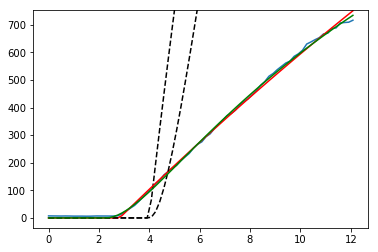

In [37]:
data = egfp[40]
sigma = np.sqrt(data)
result2 = twostage_model.fit(data, t=time, t0=4, ktl=800, delta=0.07, beta=0.05, weights=1/sigma)
result3 = threestage_model.fit(data, t=time, t0=4, ktl=800, km=1,delta=0.07, beta=0.05, weights=1/sigma)
plt.figure()
plt.plot(time,data)
plt.plot(time,result2.init_fit, 'k--')
plt.plot(time, result2.best_fit, 'r-')
plt.plot(time,result3.init_fit, 'k--')
plt.plot(time, result3.best_fit, 'g-')
plt.ylim((-0.05*data.max(),data.max()*1.05))
print(result2.fit_report())
print(result3.fit_report())

In [38]:
# cluster analysis to find the onset for fluorescence
# normalize the data
time_norm=(time-time.min())/50/(time.max()-time.min())
t0cluster_list=[]
for data in egfp:
    data_norm=(data-data.min())/(data.max()-data.min())
    data_diff_norm=np.gradient(data_norm)
    # combine the data
    X = np.vstack((time_norm,data_norm,data_diff_norm)).T
    # generate the linkage matrix
    Z = ch.linkage(X, method='single',metric='cityblock')
    tree = ch.cut_tree(Z, height=0.003).flatten()
    t0cluster_list.append(tree[tree==0].size)
t0cluster_list=np.array(t0cluster_list)
# convert to hours
t0cluster_list=(t0cluster_list)*10/60

data set 0 t0_guess 2.2665259646069047
data set 1 t0_guess 2.376636904761905
data set 2 t0_guess 1.987084182693728
data set 3 t0_guess 3.490902242311442
data set 4 t0_guess 4.129172257363747
data set 5 t0_guess 3.730086124401914
data set 6 t0_guess 5.807526788300029
data set 7 t0_guess 5.127684505071704
data set 8 t0_guess 2.5822710216161937
data set 9 t0_guess 3.844860752225093
data set 10 t0_guess 2.277514523795552
data set 11 t0_guess 2.3277782873215322
data set 12 t0_guess 2.9175524873306444
data set 13 t0_guess 4.2416776171703905
data set 14 t0_guess 2.7990652557319224
data set 15 t0_guess 2.3679772784970807
data set 16 t0_guess 3.4772164437840516
data set 17 t0_guess 2.7811790780141843
data set 18 t0_guess 2.5846124031007753
data set 19 t0_guess 5.8859477124183
data set 20 t0_guess 3.403904045155221
data set 21 t0_guess 3.829224572004028
data set 22 t0_guess 2.216414577931432


/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


data set 23 t0_guess 0.03935389133626971
data set 24 t0_guess 2.4198075348075347
data set 25 t0_guess 2.3744647954329214
data set 26 t0_guess 2.2054840247973297
data set 27 t0_guess 3.4909127518550793
data set 28 t0_guess 3.0595
data set 29 t0_guess 2.424766188421901
data set 30 t0_guess 2.101782166932621
data set 31 t0_guess 2.302657393118427
data set 32 t0_guess 6.215683219812247
data set 33 t0_guess 4.590905349794239
data set 34 t0_guess 4.854990403071017
data set 35 t0_guess 2.760470774091627
data set 36 t0_guess 2.901072552895527
data set 37 t0_guess 1.8290912468266909
data set 38 t0_guess 3.108518909431132
data set 39 t0_guess 2.337213930348258
data set 40 t0_guess 3.272417816896713
data set 41 t0_guess 2.0485679357317497
data set 42 t0_guess 2.3601392598244946
data set 43 t0_guess 2.2097406955000602
data set 44 t0_guess 2.2447795033473454
data set 45 t0_guess 2.146682693363191
data set 46 t0_guess 2.4519854758961683
data set 47 t0_guess 3.3315568022440436
data set 48 t0_guess 6.

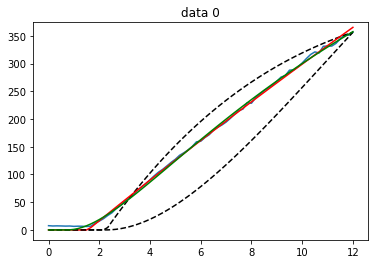

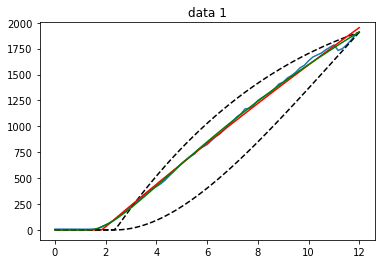

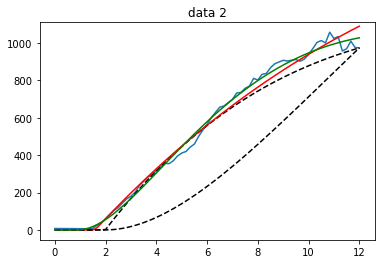

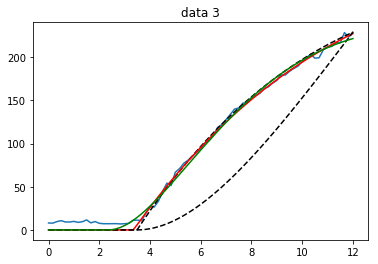

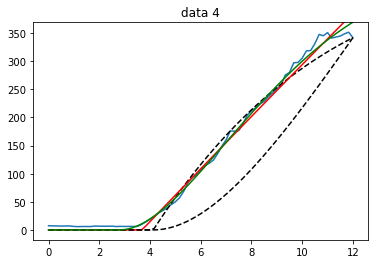

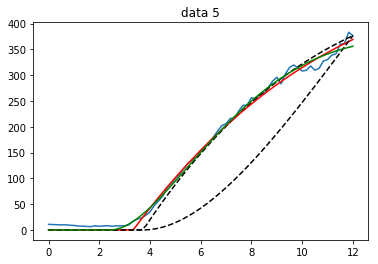

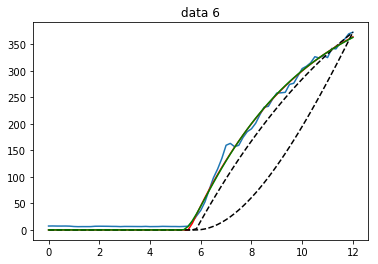

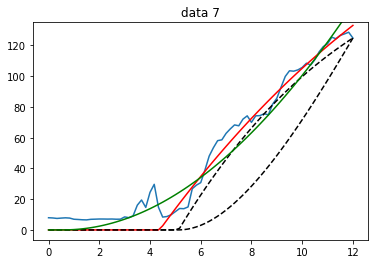

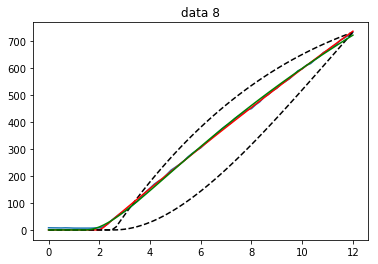

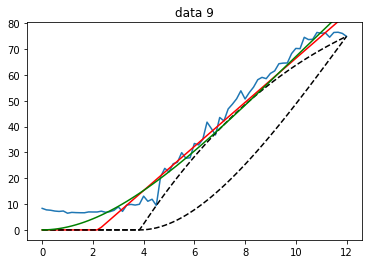

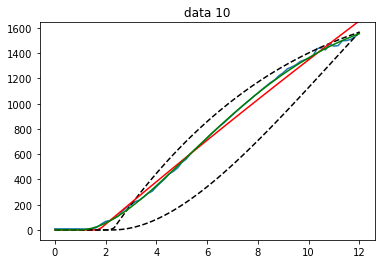

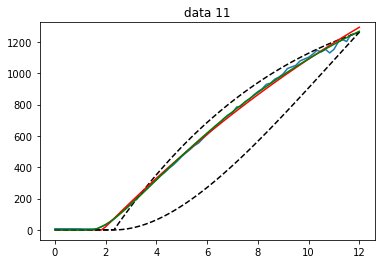

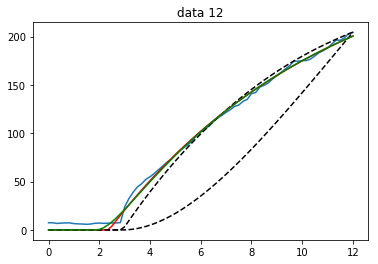

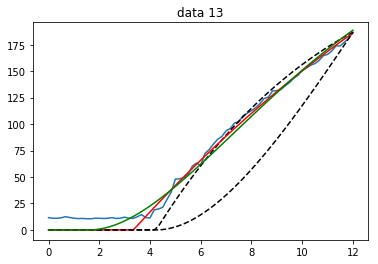

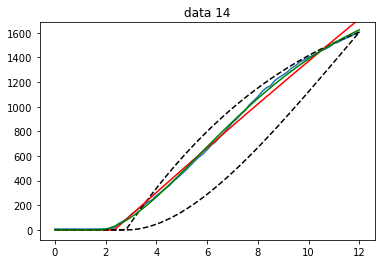

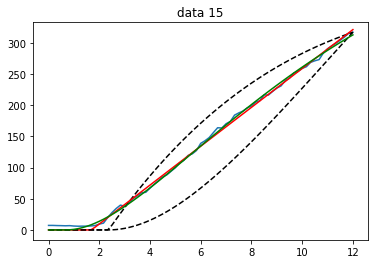

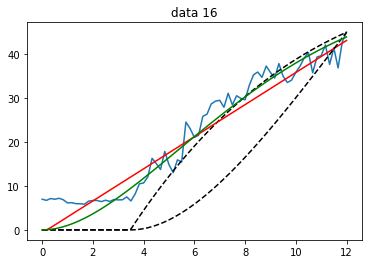

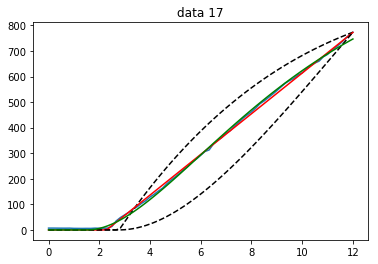

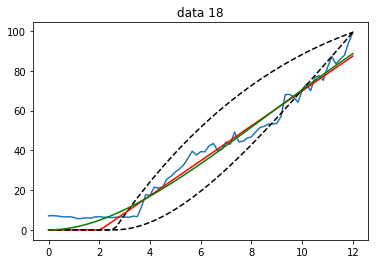

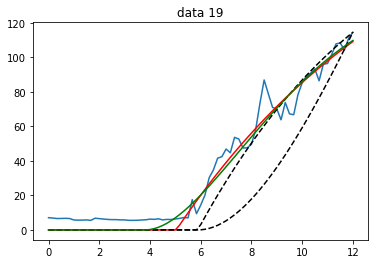

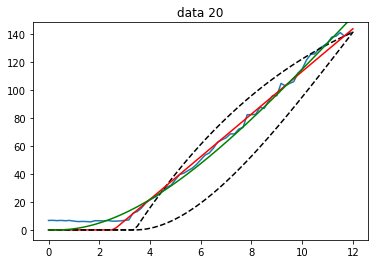

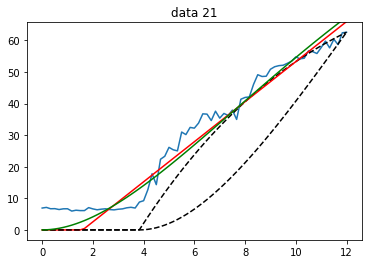

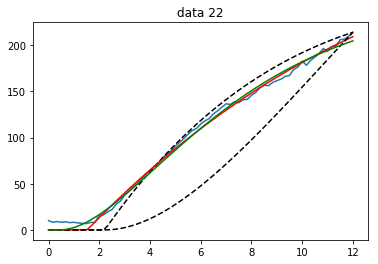

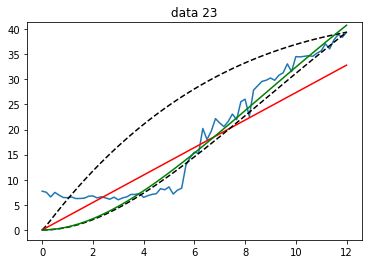

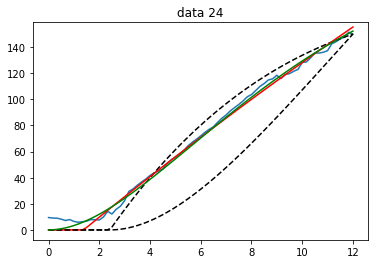

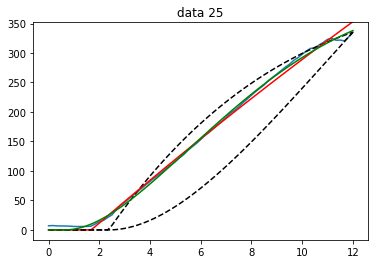

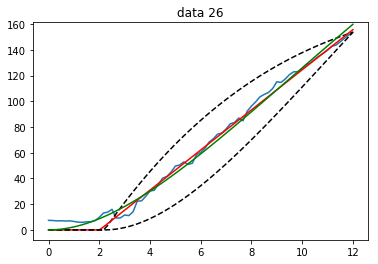

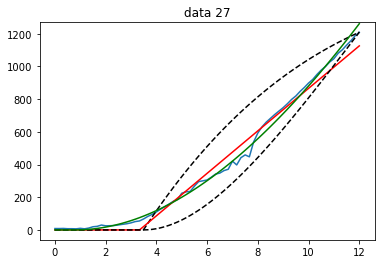

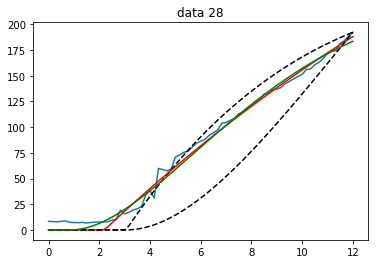

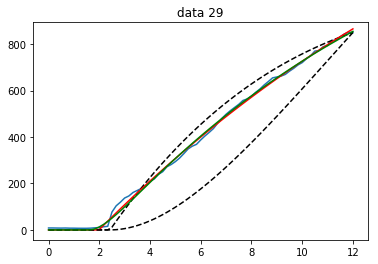

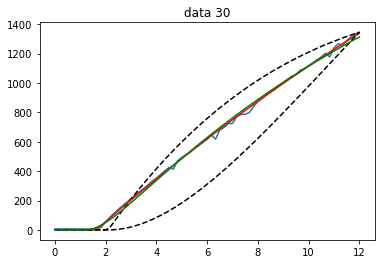

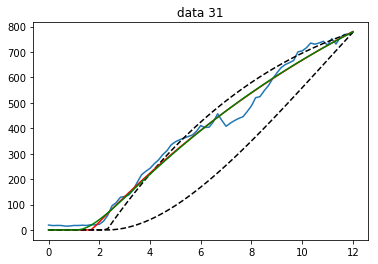

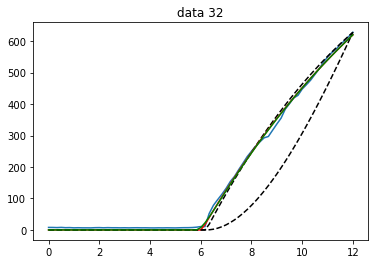

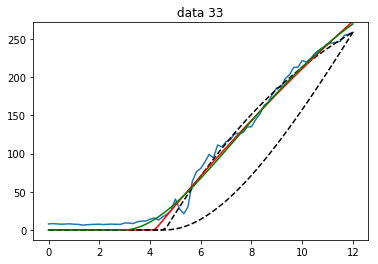

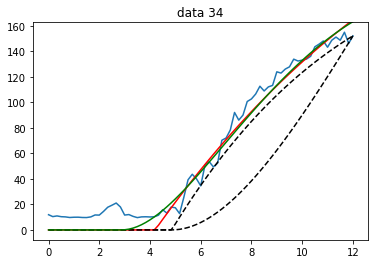

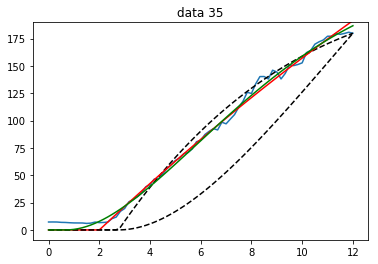

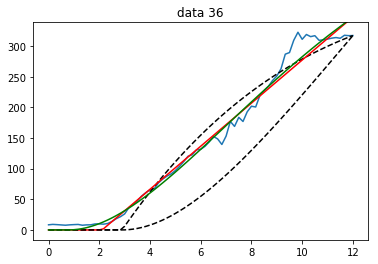

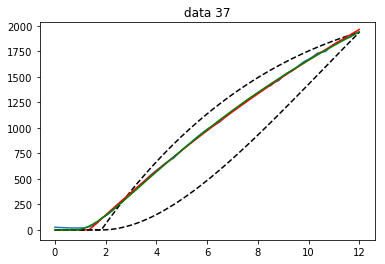

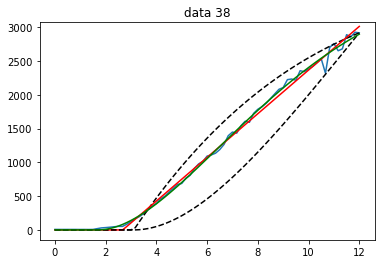

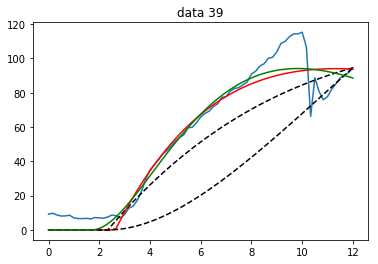

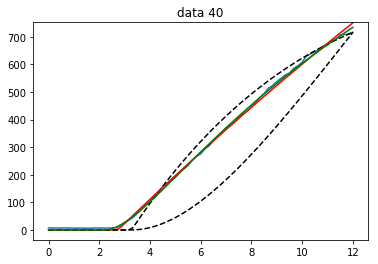

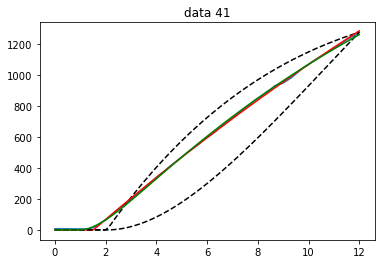

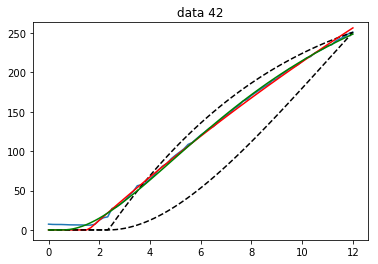

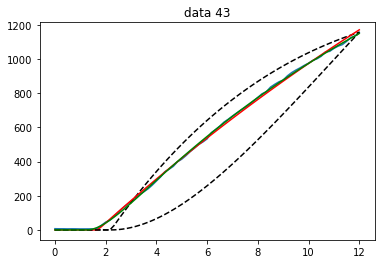

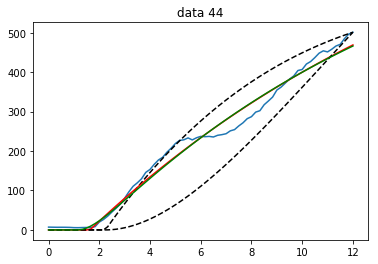

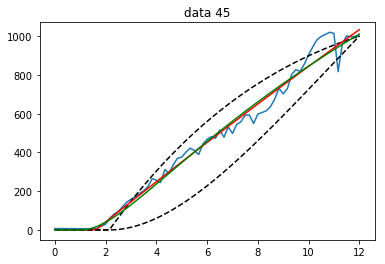

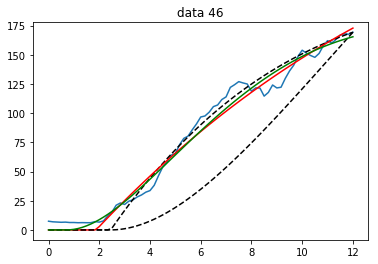

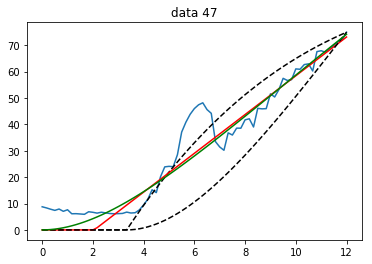

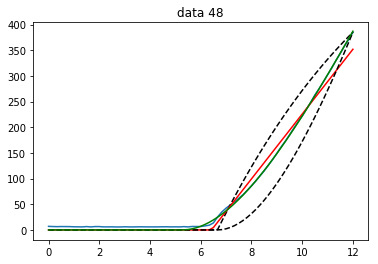

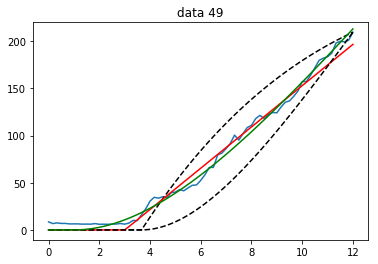

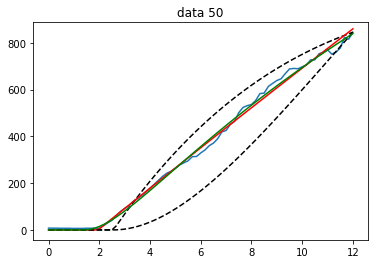

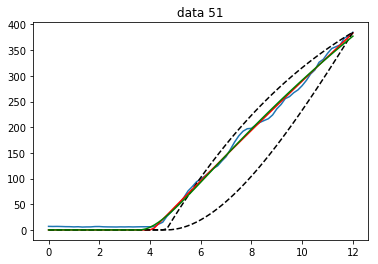

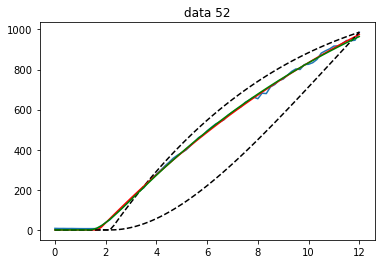

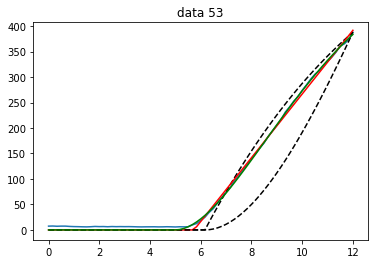

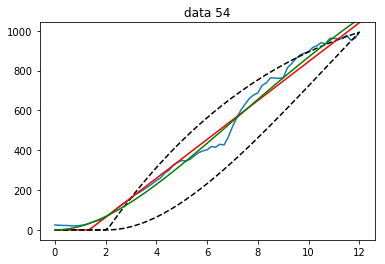

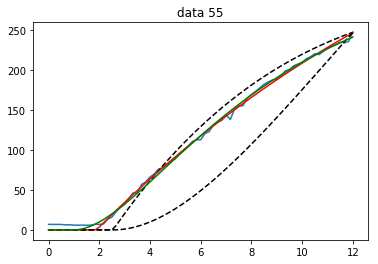

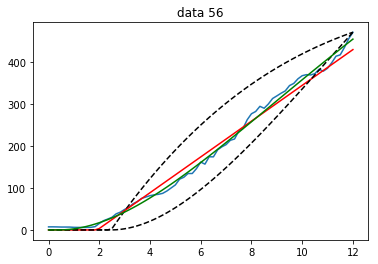

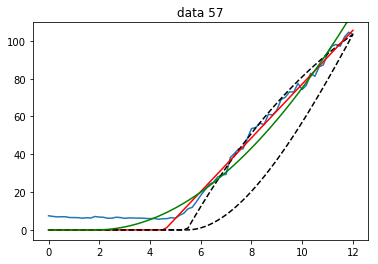

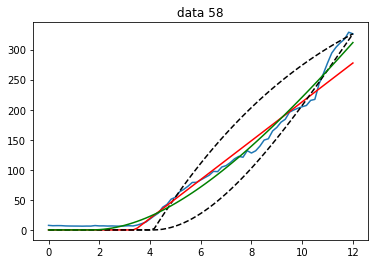

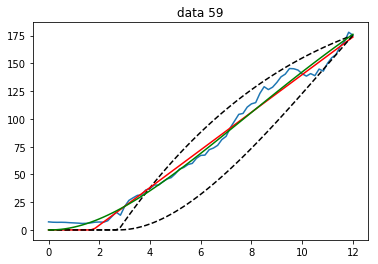

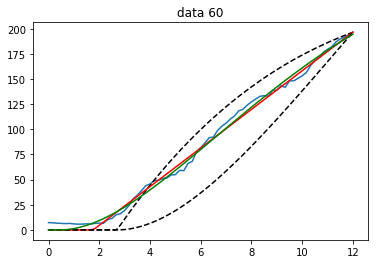

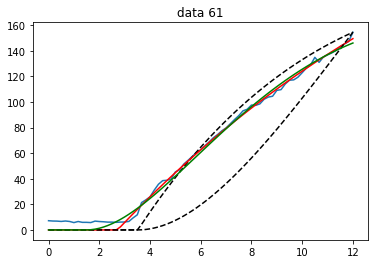

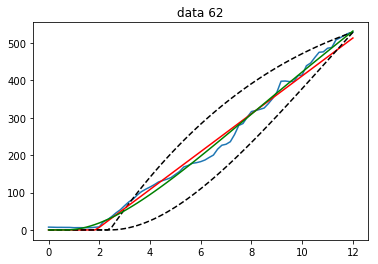

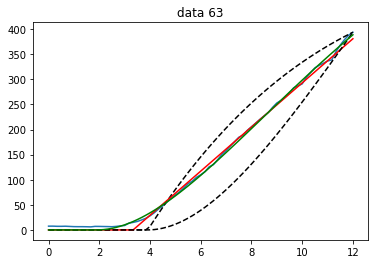

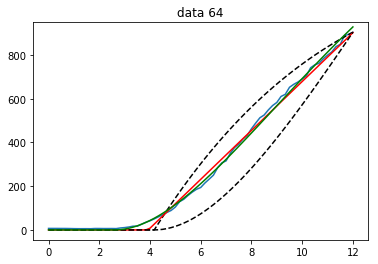

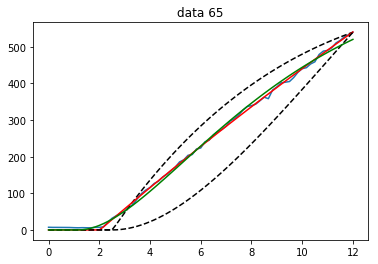

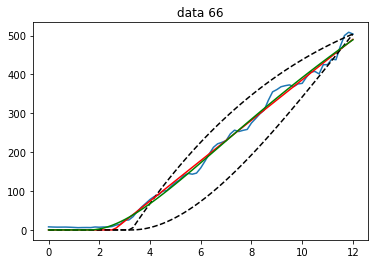

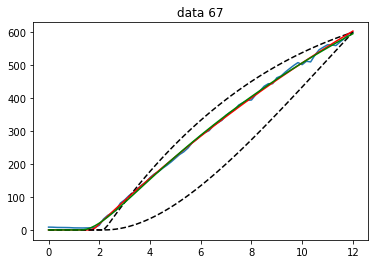

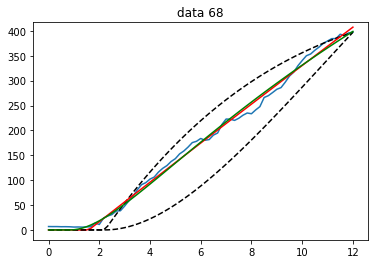

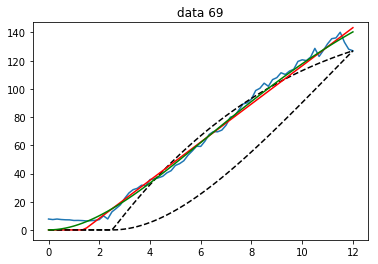

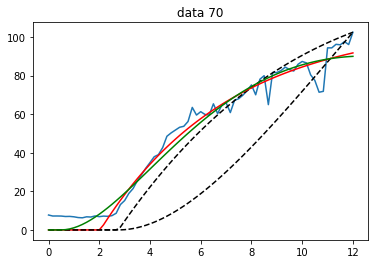

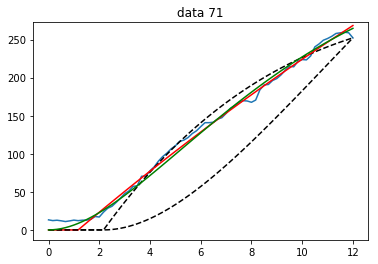

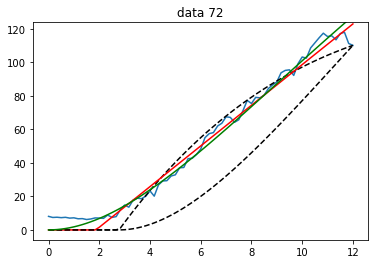

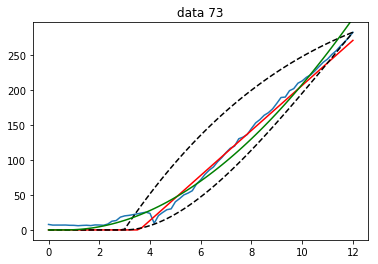

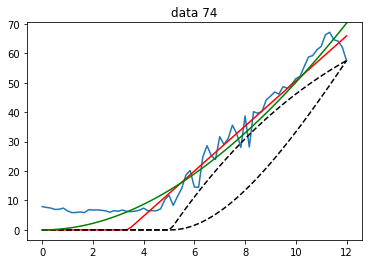

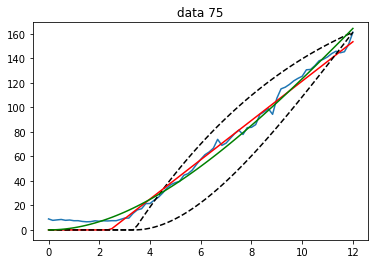

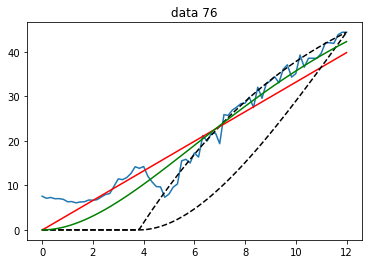

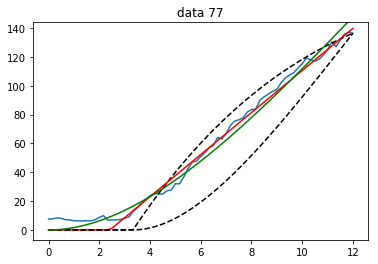

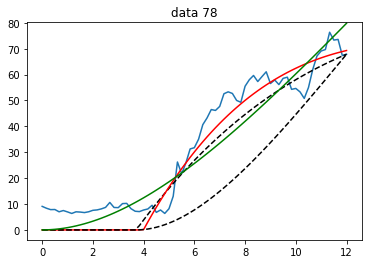

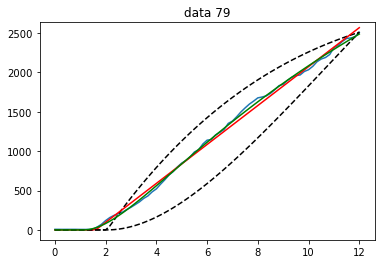

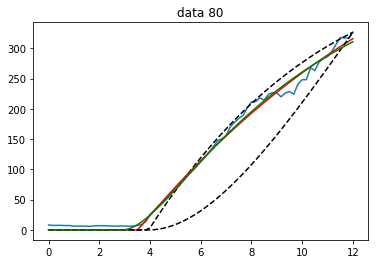

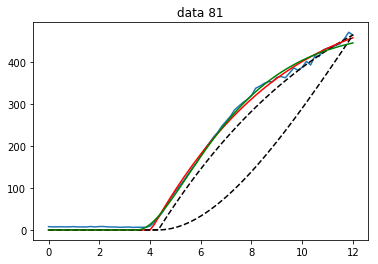

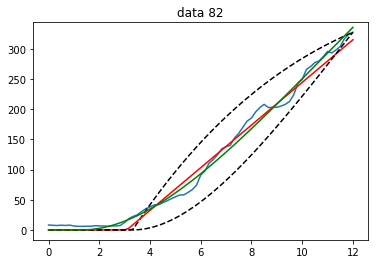

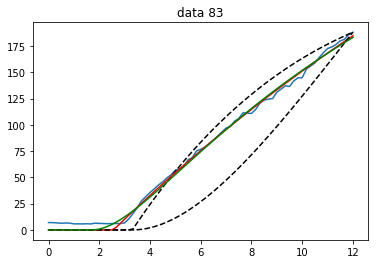

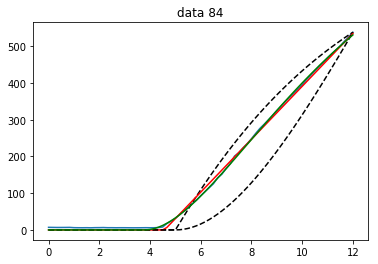

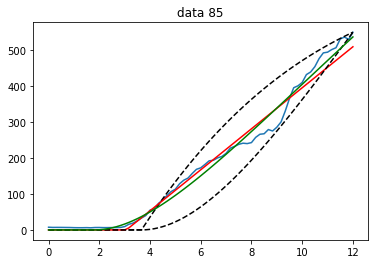

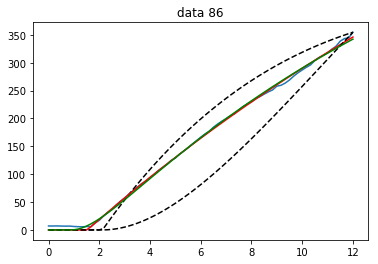

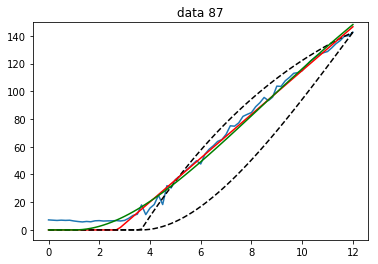

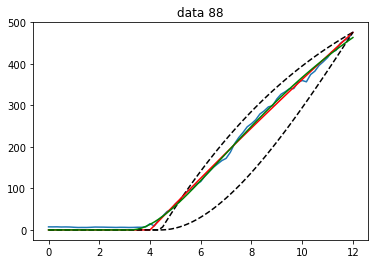

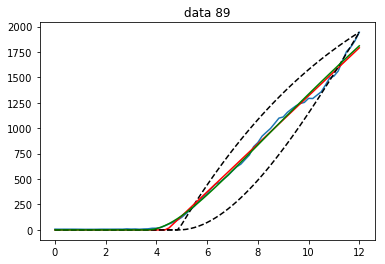

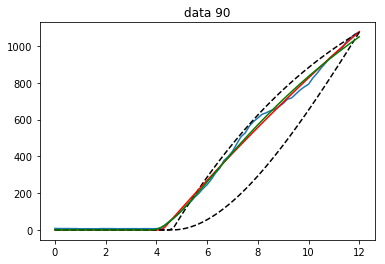

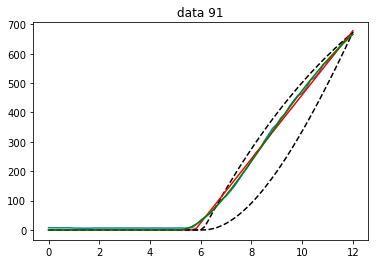

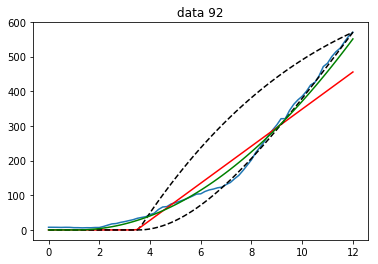

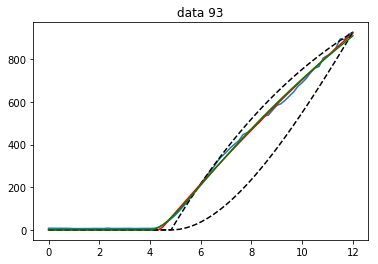

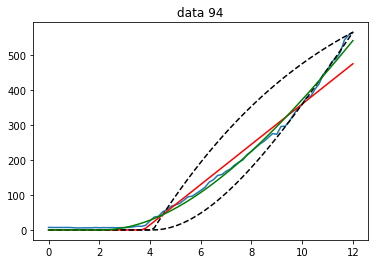

In [42]:
# two stage model
t0_list=[]
ktl_list=[]
delta_list=[]
beta_list=[]
t0_std_list=[]
ktl_std_list=[]
delta_std_list=[]
beta_std_list=[]
red_chi2_list=[]

# three stage model
t0_list3=[]
ktl_list3=[]
km_list3=[]
delta_list3=[]
beta_list3=[]
t0_std_list3=[]
ktl_std_list3=[]
km_std_list3=[]
delta_std_list3=[]
beta_std_list3=[]
red_chi2_list3=[]

for data,i in zip(egfp,range(t0cluster_list.size)):
    sigma = np.sqrt(data)
    time = np.arange(0,data.size)*10/60
    # lets estimate the parameters
    # to estimate t0 we take I_max-I_min and estimate t for which I=I_min+0.1(I_max-Imin)
    # this can be done by interpolation.  The advantage is that the guess for t0 is greater
    # than the actual value - fits seems to converge better
    delta_I=data.max()-data.min()
    t0guess = interp1d(data,time)(data.min()+0.05*delta_I)
    print("data set",i,"t0_guess",t0guess)
    delta_t=time[-1]-t0guess
    
    two=twostage(np.array([delta_t]),0,1,0.07,0.05)
    ktl2=data[-1]/two[0]
    
    three=threestage(np.array([delta_t]),0,1,0.03,0.07,0.05)
    ktl3=data[-1]/three[0]
    
    result2 = twostage_model.fit(data, t=time, t0=t0guess, ktl=ktl2, delta=0.07, beta=0.05, weights=1/sigma)
    result3 = threestage_model.fit(data, t=time, t0=t0guess, ktl=ktl3, km=0.03,delta=0.07, beta=0.05, weights=1/sigma)

    plt.figure()
    plt.title("data "+str(i))
    plt.plot(time,data)
    plt.plot(time,result2.init_fit, 'k--')
    plt.plot(time, result2.best_fit, 'r-')
    plt.plot(time,result3.init_fit, 'k--')
    plt.plot(time, result3.best_fit, 'g-')
    plt.ylim((-0.05*data.max(),data.max()*1.05))
    
    if result2:
        t0_list.append(np.abs(result2.values['t0']))
        ktl_list.append(np.abs(result2.values['ktl']))
        delta_list.append(np.abs(result2.values['delta']))
        beta_list.append(np.abs(result2.values['beta']))
        red_chi2_list.append(result2.redchi)

        t0_std_list.append(result2.covar[0][0])
        ktl_std_list.append(result2.covar[1][1])
        delta_std_list.append(result2.covar[2][2])
        beta_std_list.append(result2.covar[3][3])
    
    if result3:
        t0_list3.append(np.abs(result3.values['t0']))
        ktl_list3.append(np.abs(result3.values['ktl']))
        km_list3.append(np.abs(result3.values['km']))
        delta_list3.append(np.abs(result3.values['delta']))
        beta_list3.append(np.abs(result3.values['beta']))
        red_chi2_list3.append(result3.redchi)

        t0_std_list3.append(result3.covar[0][0])
        ktl_std_list3.append(result3.covar[1][1])
        km_std_list3.append(result3.covar[2][2])
        delta_std_list3.append(result3.covar[3][3])
        beta_std_list3.append(result3.covar[4][4])
    
t0_list=np.array(t0_list)
ktl_list=np.array(ktl_list)
delta_list=np.array(delta_list)
beta_list=np.array(beta_list)
t0_std_list=np.array(t0_std_list)
ktl_std_list=np.array(ktl_std_list)
delta_std_list=np.array(delta_std_list)
beta_std_list=np.array(beta_std_list)

t0_list3=np.array(t0_list3)
ktl_list3=np.array(ktl_list3)
km_list3=np.array(km_list3)
delta_list3=np.array(delta_list3)
beta_list3=np.array(beta_list3)
t0_std_list3=np.array(t0_std_list3)
ktl_std_list3=np.array(ktl_std_list3)
km_std_list3=np.array(km_std_list3)
delta_std_list3=np.array(delta_std_list3)
beta_std_list3=np.array(beta_std_list3)

red_chi2_list=np.array(red_chi2_list)
red_chi2_list3=np.array(red_chi2_list3)


2.70749535998 2.01262879637
1.70628828428 0.957737292701
[ 6.52514499  5.29963934  3.42686403  2.39882077  1.58075184  1.05307883]
[ 4.46312097  3.62319279  2.61588539  1.75663209  1.24355605  0.82646059]


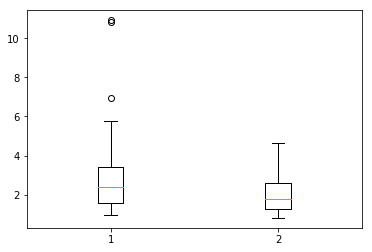

In [43]:
plt.boxplot([red_chi2_list,red_chi2_list3])
print(red_chi2_list.mean(),red_chi2_list3.mean())
print(red_chi2_list.std(),red_chi2_list3.std())
print(np.percentile(red_chi2_list,[97.5,95,75,50,25,2.5]))
print(np.percentile(red_chi2_list3,[97.5,95,75,50,25,2.5]))

In [44]:
print(np.argmax(red_chi2_list),red_chi2_list.max())
print(np.argmax(red_chi2_list3),red_chi2_list3.max())

27 10.9256281394
34 4.64719747


In [45]:
# cleaning up the data by setting a threshold for redchi2
threshold2 = 150
threshold3 = 150
ktl_list_clean=ktl_list[red_chi2_list<threshold2]
delta_list_clean=delta_list[red_chi2_list<threshold2]
beta_list_clean=beta_list[red_chi2_list<threshold2]
t0_list_clean=t0_list[red_chi2_list<threshold2]
ktl_std_list_clean=ktl_std_list[red_chi2_list<threshold2]
delta_std_list_clean=delta_std_list[red_chi2_list<threshold2]
beta_std_list_clean=beta_std_list[red_chi2_list<threshold2]
t0_std_list_clean=t0_std_list[red_chi2_list<threshold2]

ktl_list3_clean=ktl_list3[red_chi2_list3<threshold3]
km_list3_clean=km_list3[red_chi2_list3<threshold3]
delta_list3_clean=delta_list3[red_chi2_list3<threshold3]
beta_list3_clean=beta_list3[red_chi2_list3<threshold3]
t0_list3_clean=t0_list3[red_chi2_list3<threshold3]
km_std_list3_clean=km_std_list3[red_chi2_list3<threshold3]
ktl_std_list3_clean=ktl_std_list3[red_chi2_list3<threshold3]
delta_std_list3_clean=delta_std_list3[red_chi2_list3<threshold3]
beta_std_list3_clean=beta_std_list3[red_chi2_list3<threshold3]
t0_std_list3_clean=t0_std_list3[red_chi2_list3<threshold3]


In [46]:
print(ktl_list.size,ktl_list_clean.size)
print(ktl_list3.size,ktl_list3_clean.size)

95 95
95 95


66.5594101335 2169.54788925


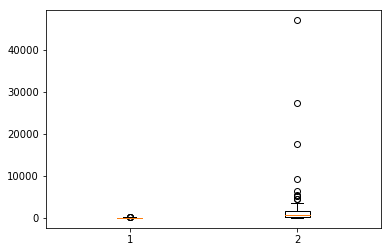

In [47]:
plt.boxplot([ktl_list_clean,ktl_list3_clean])
print(ktl_list_clean.mean(),ktl_list3_clean.mean())

(array([ 87.,   5.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([  4.15312042e+01,   4.73238283e+03,   9.42323445e+03,
          1.41140861e+04,   1.88049377e+04,   2.34957893e+04,
          2.81866410e+04,   3.28774926e+04,   3.75683442e+04,
          4.22591958e+04,   4.69500475e+04]),
 <a list of 10 Patch objects>)

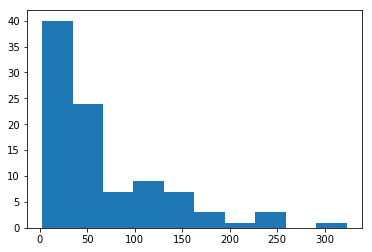

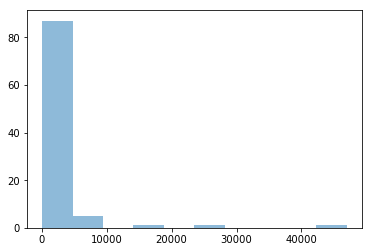

In [48]:
plt.figure()
plt.hist(ktl_list_clean)
plt.figure()
plt.hist(ktl_list3_clean,alpha=0.5)

(array([ 50.,  18.,  15.,   3.,   3.,   1.,   1.,   1.,   1.,   2.]),
 array([ 0.00460819,  0.03265717,  0.06070614,  0.08875512,  0.11680409,
         0.14485307,  0.17290204,  0.20095102,  0.22899999,  0.25704897,
         0.28509794]),
 <a list of 10 Patch objects>)

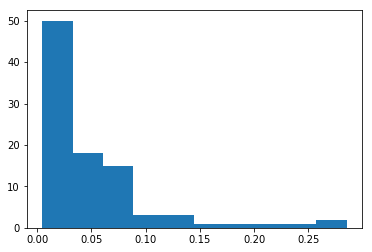

In [49]:
plt.figure()
plt.hist(km_list3_clean)

{'boxes': [<matplotlib.lines.Line2D at 0x11b9f4588>,
 'caps': [<matplotlib.lines.Line2D at 0x1145e8198>,
 'fliers': [<matplotlib.lines.Line2D at 0x114531e48>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x114531ba8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x114546278>,
  <matplotlib.lines.Line2D at 0x114527cf8>]}

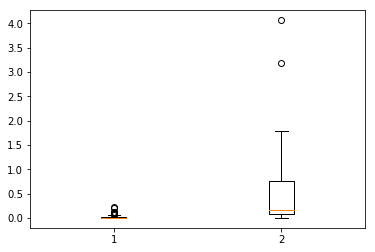

In [50]:
plt.boxplot([delta_list_clean,delta_list3_clean])

0.0177491683456 0.495076669512


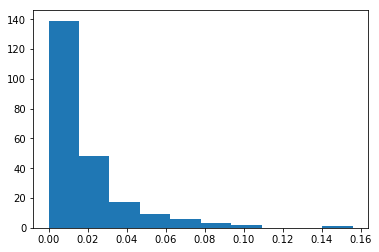

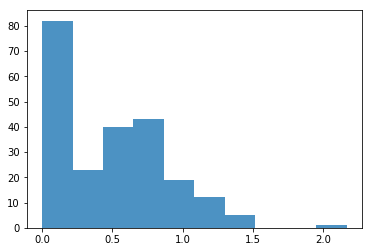

In [28]:
plt.figure()
plt.hist(delta_list_clean)
plt.figure()
plt.hist(delta_list3_clean,alpha=0.8)
print(delta_list_clean.mean(),delta_list3_clean.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x103257588>,
 'caps': [<matplotlib.lines.Line2D at 0x11bf5cda0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11bf42278>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11c14f0f0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x117106748>,
  <matplotlib.lines.Line2D at 0x11c169518>]}

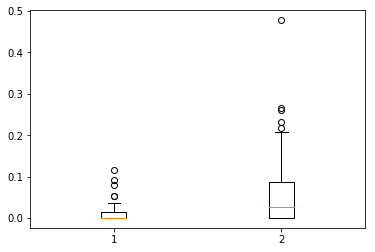

In [51]:
plt.boxplot([beta_list_clean,beta_list3_clean])

(array([ 54.,  19.,  13.,   3.,   3.,   2.,   0.,   0.,   0.,   1.]),
 array([  7.61251404e-09,   4.77784249e-02,   9.55568422e-02,
          1.43335259e-01,   1.91113677e-01,   2.38892094e-01,
          2.86670511e-01,   3.34448929e-01,   3.82227346e-01,
          4.30005763e-01,   4.77784181e-01]),
 <a list of 10 Patch objects>)

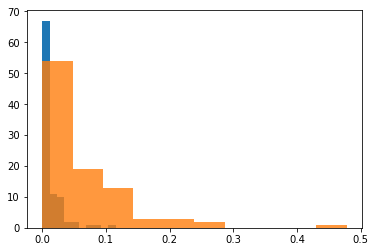

In [52]:
plt.hist(beta_list_clean)
plt.hist(beta_list3_clean,alpha=0.8)

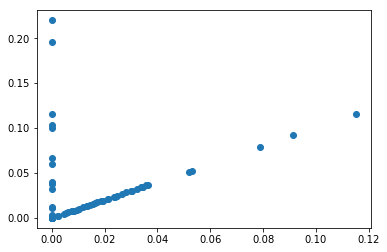

In [53]:
plt.plot(beta_list_clean,delta_list_clean,"o")

{'boxes': [<matplotlib.lines.Line2D at 0x113265d68>],
 'caps': [<matplotlib.lines.Line2D at 0x116377e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x114571748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11635d860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11634ee10>,
  <matplotlib.lines.Line2D at 0x11634ef98>]}

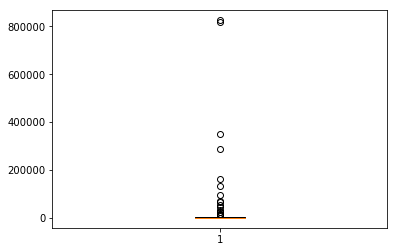

In [54]:
error_delta = delta_std_list_clean/delta_list_clean
plt.boxplot(error_delta)

{'boxes': [<matplotlib.lines.Line2D at 0x125e97e80>,
 'caps': [<matplotlib.lines.Line2D at 0x126884908>,
 'fliers': [<matplotlib.lines.Line2D at 0x12688ab00>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12688a2e8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x12687f898>,
  <matplotlib.lines.Line2D at 0x1268a6cc0>]}

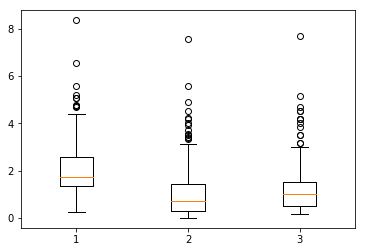

In [33]:
plt.boxplot([t0_list_clean,t0_list3_clean,t0cluster_list])

2.65806487804
1.48018047846
1.6


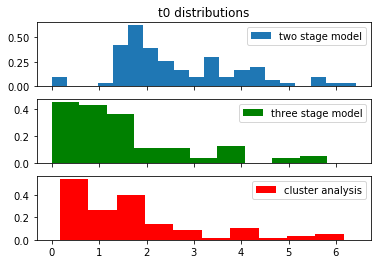

In [56]:
plt.figure()
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(3, sharex=True)
axarr[0].hist(t0_list_clean, bins=20,normed=True,label='two stage model')
axarr[0].set_title('t0 distributions')
axarr[0].legend()
axarr[1].hist(t0_list3_clean,bins=10,color='g',normed=True,label='three stage model')
axarr[1].legend()
axarr[2].hist(t0cluster_list,bins=10,color='r',normed=True,label='cluster analysis')
axarr[2].legend()
print(t0_list_clean.mean())
print(t0_list3_clean.mean())
print(t0cluster_list.mean())

In [59]:
# save data
np.save("k1_t0_two",t0_list_clean)
np.save("k1_t0_three",t0_list3_clean)
np.save("k1_t0_cluster",t0cluster_list)

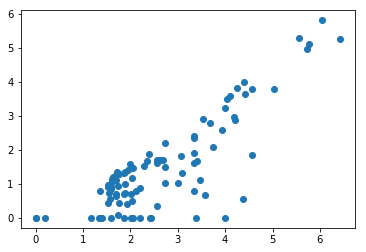

In [58]:
plt.plot(t0_list_clean,t0_list3_clean,"o")